# **Pima Indians Diabetes Database Descriptive Statistics Project**

Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.




### **Columns of the dataset**

- **Pregnancies:** Number of times pregnant

- **Glucose:** Plasma glucose concentration 2 hours in an oral glucose tolerance test

- **Blood Pressure:** Diastolic blood pressure (mm Hg)

- **Skin Thickness:** Triceps skin fold thickness (mm

- **Insulin:** 2-Hour serum insulin (mu U/ml)

- **BMI:** Body mass index (weight in kg/(height in m)^2) 

- **Diabetes Pedigree Function:** Diabetes pedigree function

- **Age:** Age (years)

- **Outcome:** Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
diabetes = pd.read_csv("diabetes.csv")

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.    Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

- **Finding if there are any null and Zero values in the data set**

In [5]:
diabetes.isnull().values.any()
## To check if data contains null values

False

- Data frame doesn’t have any NAN values
- As a next step, we will do preliminary screening of descriptive stats for the dataset

In [6]:
diabetes.describe()
## To run numerical descriptive stats for the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Minimum values for many variables are 0.
- As biological parameters like Glucose, BloodPreasure, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have     been coded as zeros

In [7]:
(diabetes.Pregnancies == 0).sum(),(diabetes.Glucose==0).sum(),(diabetes.BloodPressure==0).sum(),(diabetes.SkinThickness==0).sum(),(diabetes.Insulin==0).sum(),(diabetes.BMI==0).sum(),(diabetes.DiabetesPedigreeFunction==0).sum(),(diabetes.Age==0).sum()
## Counting cells with 0 Values for each variable and publishing the counts below

(111, 5, 35, 227, 374, 11, 0, 0)

- As Zero Counts of some the variables are as high as 374 and 227, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (excl Pregnancies & Outcome)
- As a next step, we’ll drop 0 values and create a our new dataset which can be used for further analysis

In [11]:
#dropping null values

drop_Glu=diabetes.index[diabetes.Glucose == 0].tolist()
drop_BP=diabetes.index[diabetes.BloodPressure == 0].tolist()
drop_Skin = diabetes.index[diabetes.SkinThickness==0].tolist()
drop_Ins = diabetes.index[diabetes.Insulin==0].tolist()
drop_BMI = diabetes.index[diabetes.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
diabetes_f=diabetes.drop(diabetes.index[c])

In [12]:
#diabetes_f is the final dataset with the non-zero values
diabetes_f

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


- Finding the rows and the columns of the dataset

In [13]:
# .shape function is used to find the columns and the rows of the dataset

diabetes_f.shape

(392, 9)

  **As we can see:**
  - Total number **Rows** are 392
  - Total number of **columns** are 9
  
  
  **Datatypes in statisical terms**

  - ***Pregnencies :-*** Discrete data
  - ***Glucose :-*** Discrete data
  - ***BloodPressure :-*** Discrete data
  - ***SkinThickness :-*** Discrete data
  - ***Insulin :-*** Discrete data
  - ***BMI :-*** Continuous data
  - ***DiabetesPedigreeFunction :-*** Continuous data
  - ***Age :-*** Continuous data
  - ***Outcome :-*** Catagorical data

## 2.  Calculate appropriate measures of central tendency for Glucose and outcome column only?

#### Glucose is numerical data.

For numerical data you have to check distribution first.

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

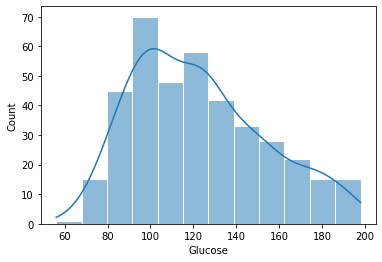

In [45]:
#Plotting histogram for the distribution 

sns.histplot(diabetes_f['Glucose'], kde=True,edgecolor = 'white')

As we can see Gluose is containing **skewed data**.

The **median** is usually preferred to other measures of central tendency when your data set is **skewed data**. However, the mode can also be appropriate in these situations, but is not as commonly used as the median.

In [46]:
diabetes_f.Glucose.median()

119.0

Measures of central tendency for **Glucose** is **119.0**

#### **Outcome** is the categorical data. 

For **categorical data**, we have to use the **mode**. In cases where you are deciding between the mean and median as the better measure of central tendency, you are also determining which types of statistical hypothesis tests are appropriate for our data—if that is your ultimate goal.

In [44]:
diabetes_f.Outcome.mode()

0    0
dtype: int64

Measures of central tendency for **Outcome** is **0**

## 3. Please provide 5 points data summaries for required columns?

The five-number summary involves the calculation of 5 summary statistical quantities:

  - **min quantile**: The minimum value

  - **1st quantile**: The 25th percentile. 

  - **2nd quantile**: The 50th percentile

  - **3rd quantile**: The 75th percentile

  - **max quantile**: The maximum value

In [18]:
#Finding quantile values

diabetes_f.quantile([0,0.25,0.5,0.75, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.00,0.0,56.0,24.0,7.0,14.00,18.2,0.08500,21.0,0.0
0.25,1.0,99.0,62.0,21.0,76.75,28.4,0.26975,23.0,0.0
0.50,2.0,119.0,70.0,29.0,125.50,33.2,0.44950,27.0,0.0
0.75,5.0,143.0,78.0,37.0,190.00,37.1,0.68700,36.0,1.0
1.00,17.0,198.0,110.0,63.0,846.00,67.1,2.42000,81.0,1.0


In [19]:
# 0.0 is the min quantile
# 0.25 is the 25% which is 1st quantile
# 0.50 is the 50% which is 2nd quantile
# 0.75 is the 75% which is 3rd quantile
# 1.0 is the max quantile

## 4. Please create an appropriate plot to examine the relationship between Age and Glucose.

Text(0, 0.5, 'Age')

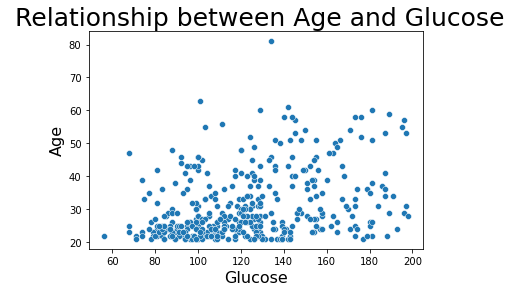

In [20]:
#Plotting Sactetr plot 

sns.scatterplot(x='Glucose', y='Age', data=diabetes_f)
plt.title(' Relationship between Age and Glucose', fontsize=25)
plt.xlabel('Glucose', fontsize=16)
plt.ylabel('Age', fontsize=16)

**The above given graph describes the relation between Age and Glucose**

## 5. Please create an appropriate plot to see the distribution of Outcome variable?


Text(0, 0.5, 'Frequency')

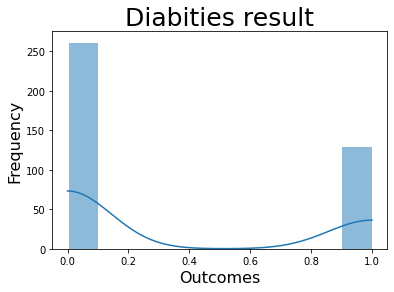

In [22]:
#Plotting histogram plot for distributing outcomes

sns.histplot(diabetes_f['Outcome'], kde=True,edgecolor = 'white')
plt.title('Diabities result', fontsize=25)
plt.xlabel('Outcomes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

**The above given graph describes the distribution of Outcome variable**

## 6. Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

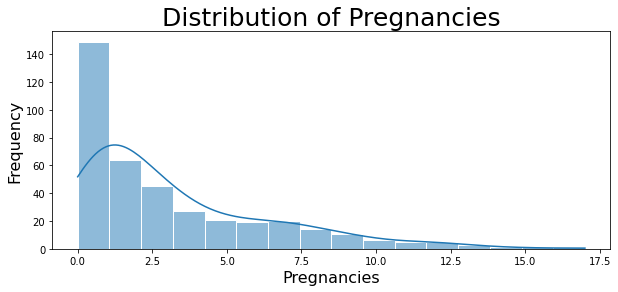

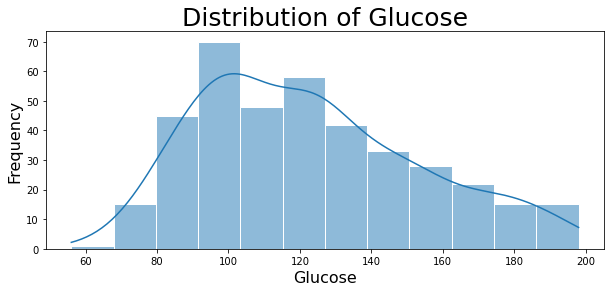

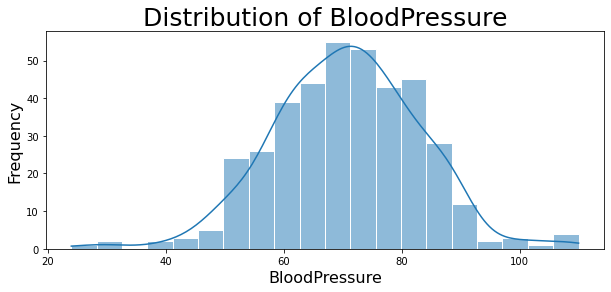

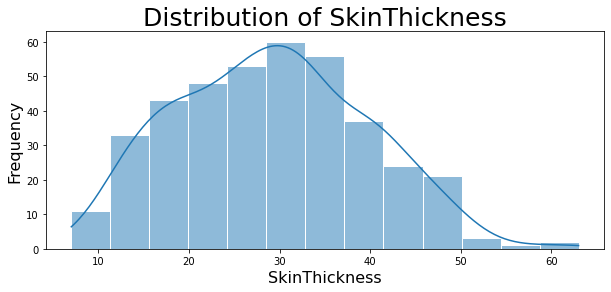

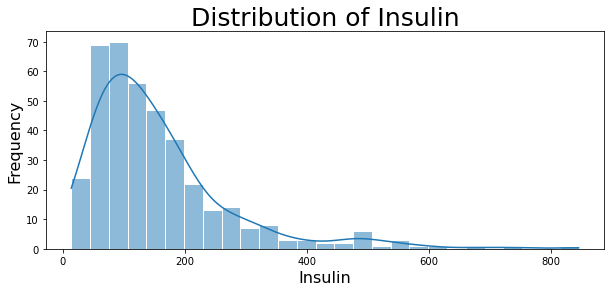

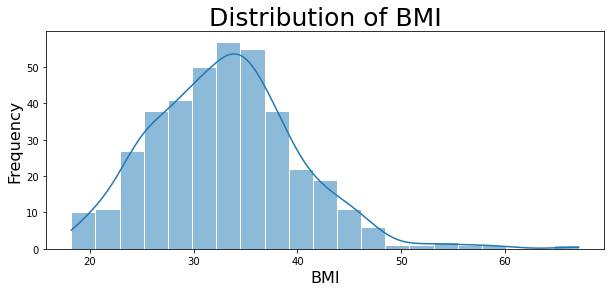

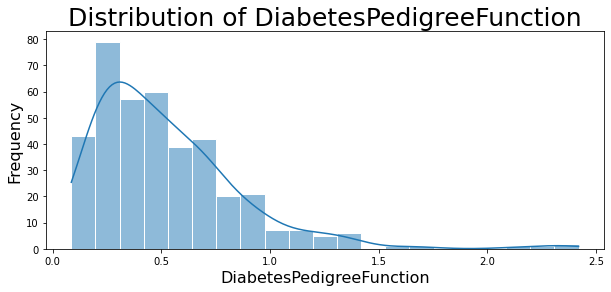

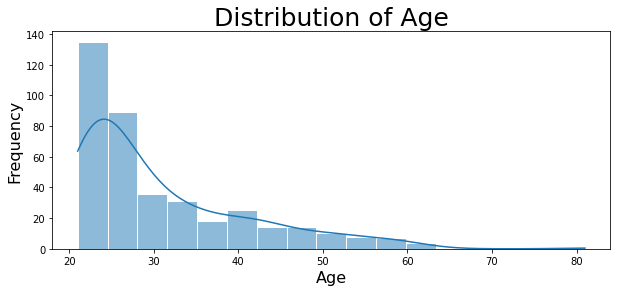

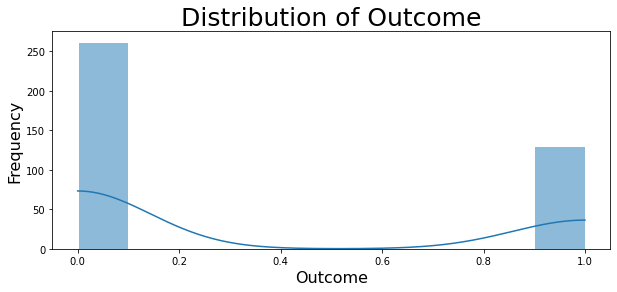

In [55]:
#Plotting multiple graphs using for loops

column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in column:
    fig, ax = plt.subplots(1,1, figsize=(10, 4))
    sns.histplot(diabetes_f[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

The direction of skewness is “**to the tail**.” The larger the number, the longer the tail. If skewness is positive, the tail on the right side of the distribution will be longer. If skewness is negative, the tail on the left side will be longer.

So as per the histogram,

**Bloodpreasure** and **SkinThickness** are **normally distributed** because they are not having skewness tail

**Outcome** variable is also **normally distributed** because there is only 2 data in which 0 mean non-diabetic and 1 means diabetic.


And **Pregnencies, Glucose, Insulin, BMI and DiabetesPedigreeFunction** variables is seems to be **skewed**, because they are having skewness tail.

  **Direction of skewness.**
  
    
  - ***Pregnencies :-*** Right tailed skewness
  - ***Glucose :-*** Right tailed skewness
  - ***Insulin :-*** Right tailed skewness
  - ***BMI :-*** Right tailed skewness
  - ***DiabetesPedigreeFunction :-*** Right tailed skewness
  - ***Age :-*** Right tailed skewness
  

## 7. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed

In [25]:
diabetes_f.skew()

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
Outcome                     0.717990
dtype: float64

#### As a general rule of thumb:

1. If skewness is less than -1 or greater than 1, the distribution is highly skewed.
1. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
1. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

  **Distribution as per the skewness value given above**

  - ***Pregnencies :-*** highly skewed
  - ***Glucose :-*** moderately skewed
  - ***BloodPressure :-*** symmetrical
  - ***SkinThickness :-*** symmetrical
  - ***Insulin :-*** highly skewed
  - ***BMI :-*** moderately skewed
  - ***DiabetesPedigreeFunction :-*** highly skewed
  - ***Age :-*** highly skewed
  - ***Outcome :-*** moderately skewed

## 8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

<AxesSubplot:xlabel='Outcome'>

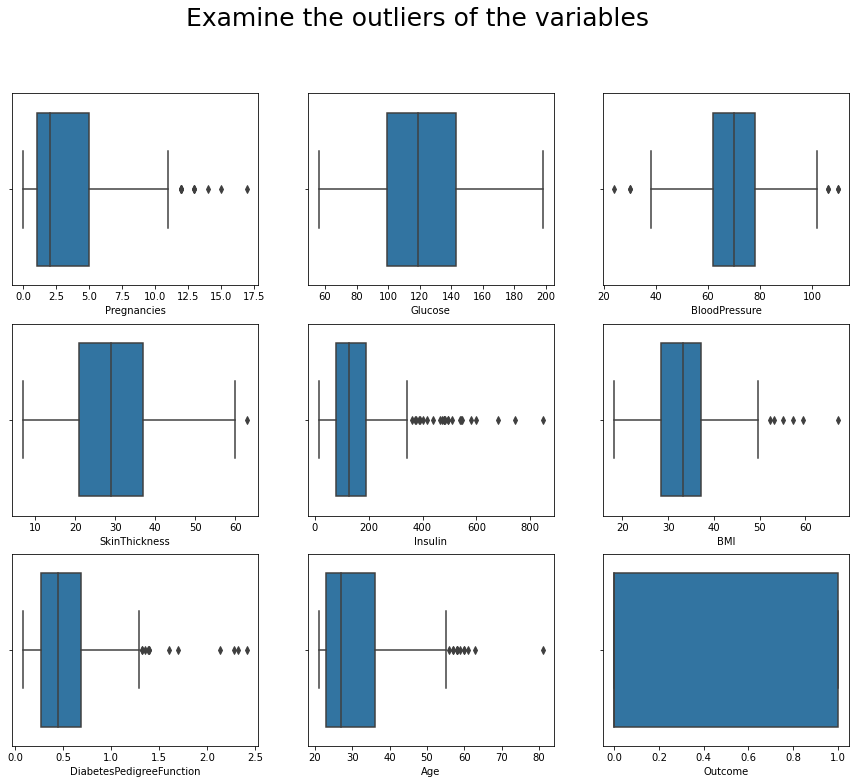

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
 
fig.suptitle('Examine the outliers of the variables', fontsize=25)

sns.boxplot(diabetes_f['Pregnancies'], ax=axes[0, 0])
sns.boxplot(diabetes_f['Glucose'], ax=axes[0, 1])
sns.boxplot(diabetes_f['BloodPressure'], ax=axes[0, 2])
sns.boxplot(diabetes_f['SkinThickness'], ax=axes[1, 0])
sns.boxplot(diabetes_f['Insulin'], ax=axes[1, 1])
sns.boxplot(diabetes_f['BMI'], ax=axes[1, 2])
sns.boxplot(diabetes_f['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.boxplot(diabetes_f['Age'], ax=axes[2, 1])
sns.boxplot(diabetes_f['Outcome'], ax=axes[2, 2])

#### What is outliers ?

 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

  **So thhe varibales containing outliers are:**

  - Pregnencies
  - BloodPressure 
  - SkinThickness 
  - Insulin 
  - BMI 
  - DiabetesPedigreeFunction 
  - Age 

## 9. What should be the measures of central tendency and dispersion for skewed data?

In [28]:
#Filtering skewed data

skw_data = diabetes_f.filter(items=['Pregnancies','Glucose','Insulin', 'BMI','DiabetesPedigreeFunction','Age'])
skw_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
6,3,78,88,31.0,0.248,26
8,2,197,543,30.5,0.158,53
13,1,189,846,30.1,0.398,59
...,...,...,...,...,...,...
753,0,181,510,43.3,0.222,26
755,1,128,110,36.5,1.057,37
760,2,88,16,28.4,0.766,22
763,10,101,180,32.9,0.171,63


#### The measure of central tendency 
   - mean
   - median
   - mode

The **median** is usually preferred to other measures of central tendency when your data set is **skewed data**. However, the mode can also be appropriate in these situations, but is not as commonly used as the median.

So here we are finding mode for all the skewed data variables.

In [30]:
#median
skw_data.median()

Pregnancies                   2.0000
Glucose                     119.0000
Insulin                     125.5000
BMI                          33.2000
DiabetesPedigreeFunction      0.4495
Age                          27.0000
dtype: float64

The measure of central tendancy for all the skewed data are given above

#### The measure of dispersion can be find by:  

   - minimum value
   - maximum value
   - Range
   - variance
   - standard deviation
   - 75th percentile
   - 50th percentile
   - 25th percentile
   - IQR

The best measure of spread when the **median** is the center is the **IQR**. As for when the center is the **mean**, then **standard deviation** should be used since it measure the distance between a data point and the mean.

Here we are using **median** for the central tendancy. Therefore, we will use **IQR** to find the despersion. 

##### Interquartile range (IQR)

The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles.

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

- **Q1** is the "middle" value in the **first half** of the rank-ordered data set wich is **25th percentile**.
- **Q2** is the **median** value in the set **50th percentile**.
- **Q3** is the "middle" value in the **second half** of the rank-ordered data set **75th percentile**.

In [39]:
#25th percentile Q1
q1 = skw_data.quantile(0.25)
q1

Pregnancies                  1.00000
Glucose                     99.00000
Insulin                     76.75000
BMI                         28.40000
DiabetesPedigreeFunction     0.26975
Age                         23.00000
Name: 0.25, dtype: float64

In [38]:
#75th percentile Q3
q3 = skw_data.quantile(0.75)
q3

Pregnancies                   5.000
Glucose                     143.000
Insulin                     190.000
BMI                          37.100
DiabetesPedigreeFunction      0.687
Age                          36.000
Name: 0.75, dtype: float64

- IQR can be find by the q3-q1

In [40]:
#interquartile range
IQR = q3  - q1
IQR

Pregnancies                   4.00000
Glucose                      44.00000
Insulin                     113.25000
BMI                           8.70000
DiabetesPedigreeFunction      0.41725
Age                          13.00000
dtype: float64

IQR values for all the variables containing skewed data are given above.

### Github link is given belowed

- https://github.com/rhythmbhavsar/Diabetes-